<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/courses/ds4b-m1-4-dataviz/notebooks/s2-dataviz-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Welcome to the applied session in data visualization for Exploratory Data Analysis (EDA) in `Python`.

![](https://miro.medium.com/max/674/1*Pf07M2ljV47ObDfcyiQolA.png)

Python does have a number of different visualization libraries. 

# Python DataViz ecosystem

* [matplotlib](https://matplotlib.org/): The most oldscool way of plotting in Python. This package provides an object-oriented API for embedding plots into applications, and is fairly low level. That means, you can do pretty much everything with it, but it might be a lot of thinking and coding involved. 
* [seaborn](https://seaborn.pydata.org/): A dataviz library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics. It provides many commong visualizations out-of-the-box, and will in most cases help you plotting what you want faster and easier than with matplotlib in a "pythonic" notation.
* [Altair](https://altair-viz.github.io/): A declarative statistical visualization library. Altair’s API is simple, friendly and consistent and built on top of the powerful [Vega-Lite](http://vega.github.io/vega-lite/) visualization grammar.
* [Plotly](https://plotly.com/python/): A popular library for creating interactive dataviz.
* [Bokeh](https://bokeh.org/): Another popular library, particularly used for interactive dataviz.
* [Streamlit](https://streamlit.io/): A cool new library and API to create complex interactive visualizations and dataviz-based websites/apps.
* Honorary mention: [plotnine](https://github.com/has2k1/plotnine): An attempt to introduce HAdley Wickham's Grammar-of-Graphics (aka. [ggplot2](https://ggplot2.tidyverse.org/) in R). I still find it the most consistent approach of defining dataviz. However, while widely popular in R, it did not get much trackion in the Python community.




# Application: the `BIXI Bikeshare Data` dataset

Lets take a step back and zoom a bit into different forms of visualization. We will now take a look at the `BIXI Bikeshare Data`, covering 500k bike-rides in the BIXI bike-sharing system in Montreal.

In [ ]:
# load packages
import pandas as pd
import seaborn as sns
import altair as alt 

sns.set(color_codes=True)

import matplotlib.pyplot as plt



In [ ]:
# load the data
bike = pd.read_parquet('https://SDS-AAU.github.io/SDS-master/00_data/bikes_montreal.pq')

# Since the dataset is rather big 500k x 12 vars, we are using the parquet format
# with built in compression (file size is at 9mb, while full data is at 40mb)

In [ ]:
# Let's check out the data

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_date          500000 non-null  datetime64[ns]
 1   start_station_code  500000 non-null  int32         
 2   end_date            500000 non-null  datetime64[ns]
 3   end_station_code    500000 non-null  int32         
 4   duration_sec        500000 non-null  int32         
 5   start_day           500000 non-null  object        
 6   start_dow           500000 non-null  object        
 7   weekday             500000 non-null  object        
 8   start_hod           500000 non-null  float64       
 9   start_mon           500000 non-null  float64       
 10  start_wk            500000 non-null  float64       
 11  membership          500000 non-null  object        
dtypes: datetime64[ns](2), float64(3), int32(3), object(4)
memory usage: 40.1+ MB


In [ ]:
bike.head()

start_date  start_station_code            end_date  \
0 2017-08-16 12:10:00                6213 2017-08-16 12:30:00   
1 2017-06-25 23:22:00                6393 2017-06-25 23:27:00   
2 2017-08-10 17:26:00                6114 2017-08-10 17:29:00   
3 2017-08-17 15:25:00                6044 2017-08-17 15:32:00   
4 2017-10-12 10:39:00                6389 2017-10-12 10:49:00   

   end_station_code  duration_sec   start_day start_dow   weekday  start_hod  \
0              6391          1237  2017-08-16       Wed  workweek       12.0   
1              6394           294  2017-06-25       Sun   weekend       23.0   
2              6113           156  2017-08-10       Thu  workweek       17.0   
3              6015           419  2017-08-17       Thu  workweek       15.0   
4              6262           601  2017-10-12       Thu  workweek       10.0   

   start_mon  start_wk  membership  
0        8.0      33.0      member  
1        6.0      26.0  non-member  
2        8.0      32.0      member  
3        8.0      33.0      member  
4       10.0      41.0      member


We see here a number of different variable types present, namely:

* Continuous variables
* Categorical variables
* Temporal variables


## Basic visualization of variable types

### Summaries of One Variable: Continuous

When attempting to summarize a single variable, histograms and density distributions are often the visualization of choice.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


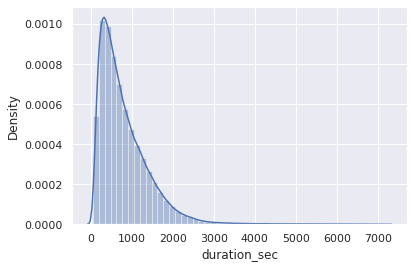

In [ ]:
# this is the basic Seaborn version of a histogram (with a density curve by default)

sns.distplot(bike.duration_sec, hist=True, kde=True)


Note the distribution appears right-skewed, since we have some outliers of very long bike rides. Adding a log-scale on the x-axis might help to reduce their impact on the visualization.




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


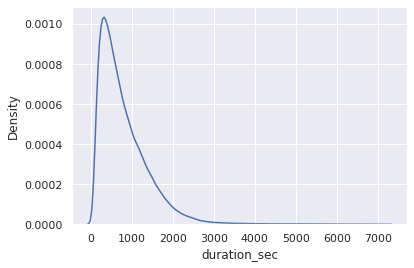

In [ ]:
sns.distplot(bike.duration_sec, hist=False, kde=True, hist_kws={'log':True})


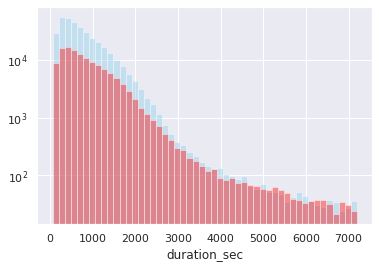

In [ ]:
# Ikke lige så elegant som i R

sns.distplot(bike[bike.weekday == "workweek"].duration_sec , color="skyblue", label="workweek", kde=False, hist_kws={'log':True})
sns.distplot(bike[bike.weekday == "weekend"].duration_sec , color="red", label="weekend", kde=False, hist_kws={'log':True})


### Summaries of One Variable: Discrete

To do the same for a discrete variable, we would start with a simple barplot. BUT: Here the way to go would be using a count-plot. Barplots require X and Y values.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


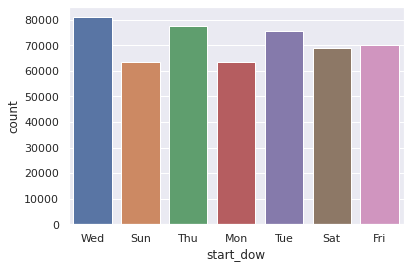

In [ ]:
sns.countplot(bike.start_dow)

That order is not too smart...and we need to intervene

In [ ]:
bike.start_dow.unique()

array(['Wed', 'Sun', 'Thu', 'Mon', 'Tue', 'Sat', 'Fri'], dtype=object)

In [ ]:
#manual labor
ordered_days = ['Mon','Tue' ,'Wed','Thu','Fri','Sat','Sun']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


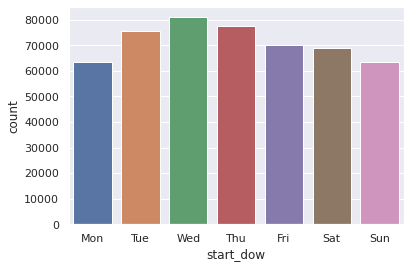

In [ ]:
sns.countplot(bike.start_dow, order=ordered_days)

We could also use the membership to bring more info into the plot. The `hue` argument can be used to visualise differences between groups over the days.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


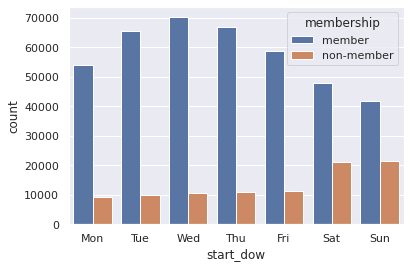

In [ ]:
sns.countplot(bike.start_dow, order=ordered_days, hue = bike.membership)

### Summaries of One Variable: Temporal

A temporal variable can also be visualized as a line-plot

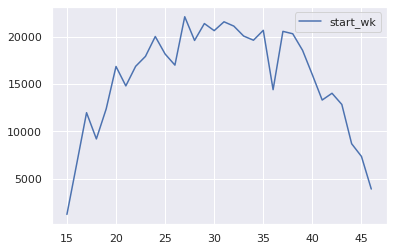

In [ ]:
# line-plots are not made to show counts but we can quickly fix that with pandas

to_plot = pd.DataFrame(bike.start_wk.value_counts()) # counting up within pandas and making a DF

sns.lineplot(data = to_plot)



## Summarizing multiple variablea jointly

Ok, that was rather easy. However, the insights gained so far are pretty little. To tease out interesting pattern in our data, it might not be enough to only look at one variable at a time. 

Lets look at some examples of adding more information:

First, we could take a look at the number of daily rides with  workweek / weekend days colored differently.



[(736434.0, 736648.0)]

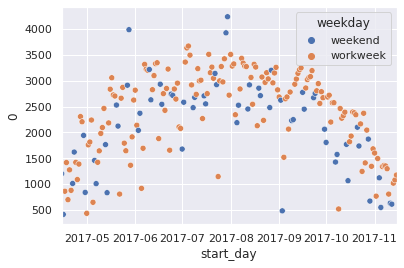

In [ ]:
# in this case we can just use groupby because a date is always linked to a specific weekday
to_plot = bike.groupby(["start_day",'weekday']).size().reset_index() # to get the frame in order to plot

plot = sns.scatterplot(data=to_plot, y = 0, x = 'start_day', hue = 'weekday', markers=True)


# for some reason searborn needs X-axis limits explicitly... :-(
plot.set(xlim = (to_plot.start_day.min(), to_plot.start_day.max()))

In [ ]:
bike.head()

start_date  start_station_code            end_date  \
0 2017-08-16 12:10:00                6213 2017-08-16 12:30:00   
1 2017-06-25 23:22:00                6393 2017-06-25 23:27:00   
2 2017-08-10 17:26:00                6114 2017-08-10 17:29:00   
3 2017-08-17 15:25:00                6044 2017-08-17 15:32:00   
4 2017-10-12 10:39:00                6389 2017-10-12 10:49:00   

   end_station_code  duration_sec   start_day start_dow   weekday  start_hod  \
0              6391          1237  2017-08-16       Wed  workweek       12.0   
1              6394           294  2017-06-25       Sun   weekend       23.0   
2              6113           156  2017-08-10       Thu  workweek       17.0   
3              6015           419  2017-08-17       Thu  workweek       15.0   
4              6262           601  2017-10-12       Thu  workweek       10.0   

   start_mon  start_wk  membership  
0        8.0      33.0      member  
1        6.0      26.0  non-member  
2        8.0      32.0      member  
3        8.0      33.0      member  
4       10.0      41.0      member


Now let's look at how rides are distributed according to the time of day. Let's make a summary plot of weekly ride counts faceted by start hour of day and broken down by workweek/weekend. Here, we will use the `FacetGrid`

In [ ]:
to_plot = bike.groupby(["start_wk",'start_hod', 'weekday']).size().reset_index()

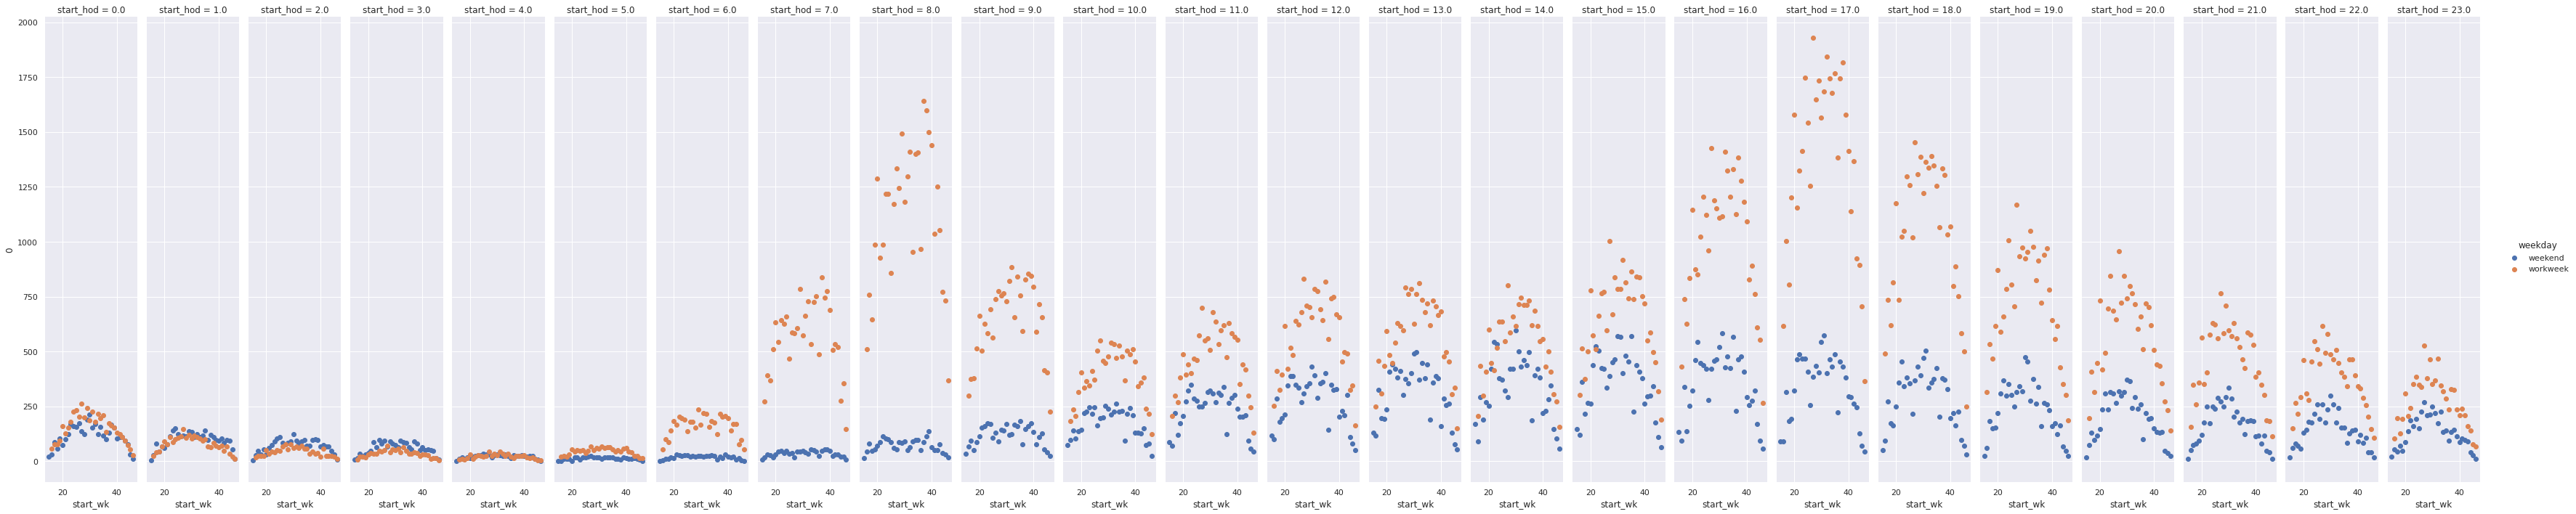

In [ ]:
g = sns.FacetGrid(to_plot, col="start_hod", hue="weekday", height=10, aspect=.2)
g = (g.map(plt.scatter, 'start_wk', 0)
     .add_legend())


sns.despine(left=True, bottom=True)


Expanding on the previous plot, let's add one more variable into our summary, adding a facet dimension for whether or not the rider is a member of BIXI.



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


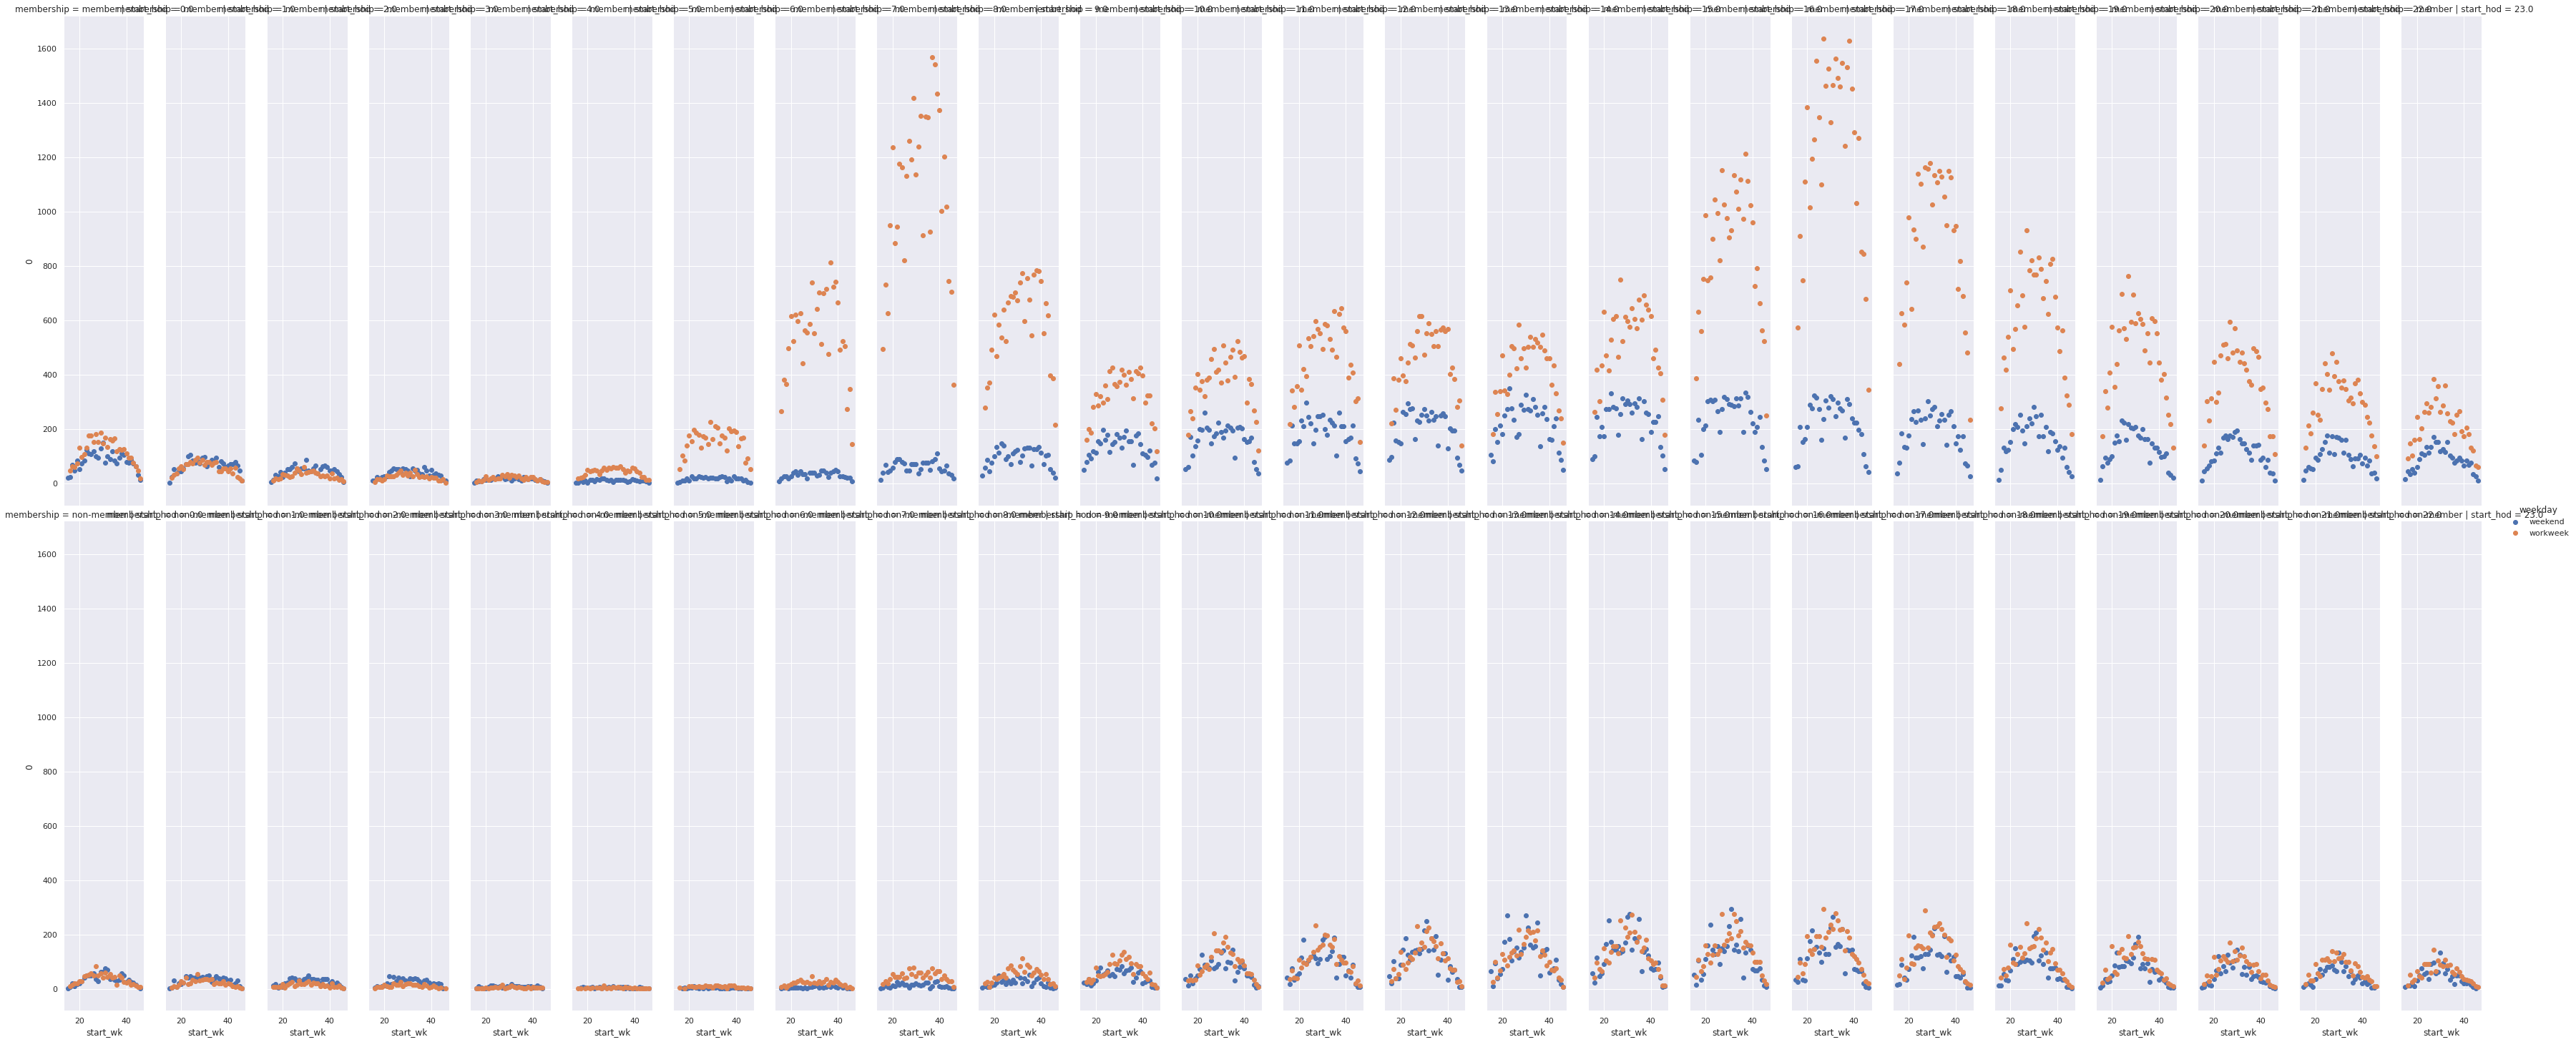

In [ ]:
to_plot = bike.groupby(["start_wk",'start_hod', 'weekday', 'membership']).size().reset_index()
g = sns.FacetGrid(to_plot, col="start_hod", row='membership', hue="weekday", height=10, aspect=.2)
g = (g.map(plt.scatter, 'start_wk', 0)
     .add_legend())


sns.despine(left=True, bottom=True)

Let's now look at the number of rides vs. hour for each day. To start, we'll create a summary dataset for the first full month in the dataset (May) and look at it.

In [ ]:
to_plot = bike[bike.start_mon == 5].groupby(["start_day",'start_hod', 'membership']).size().reset_index()

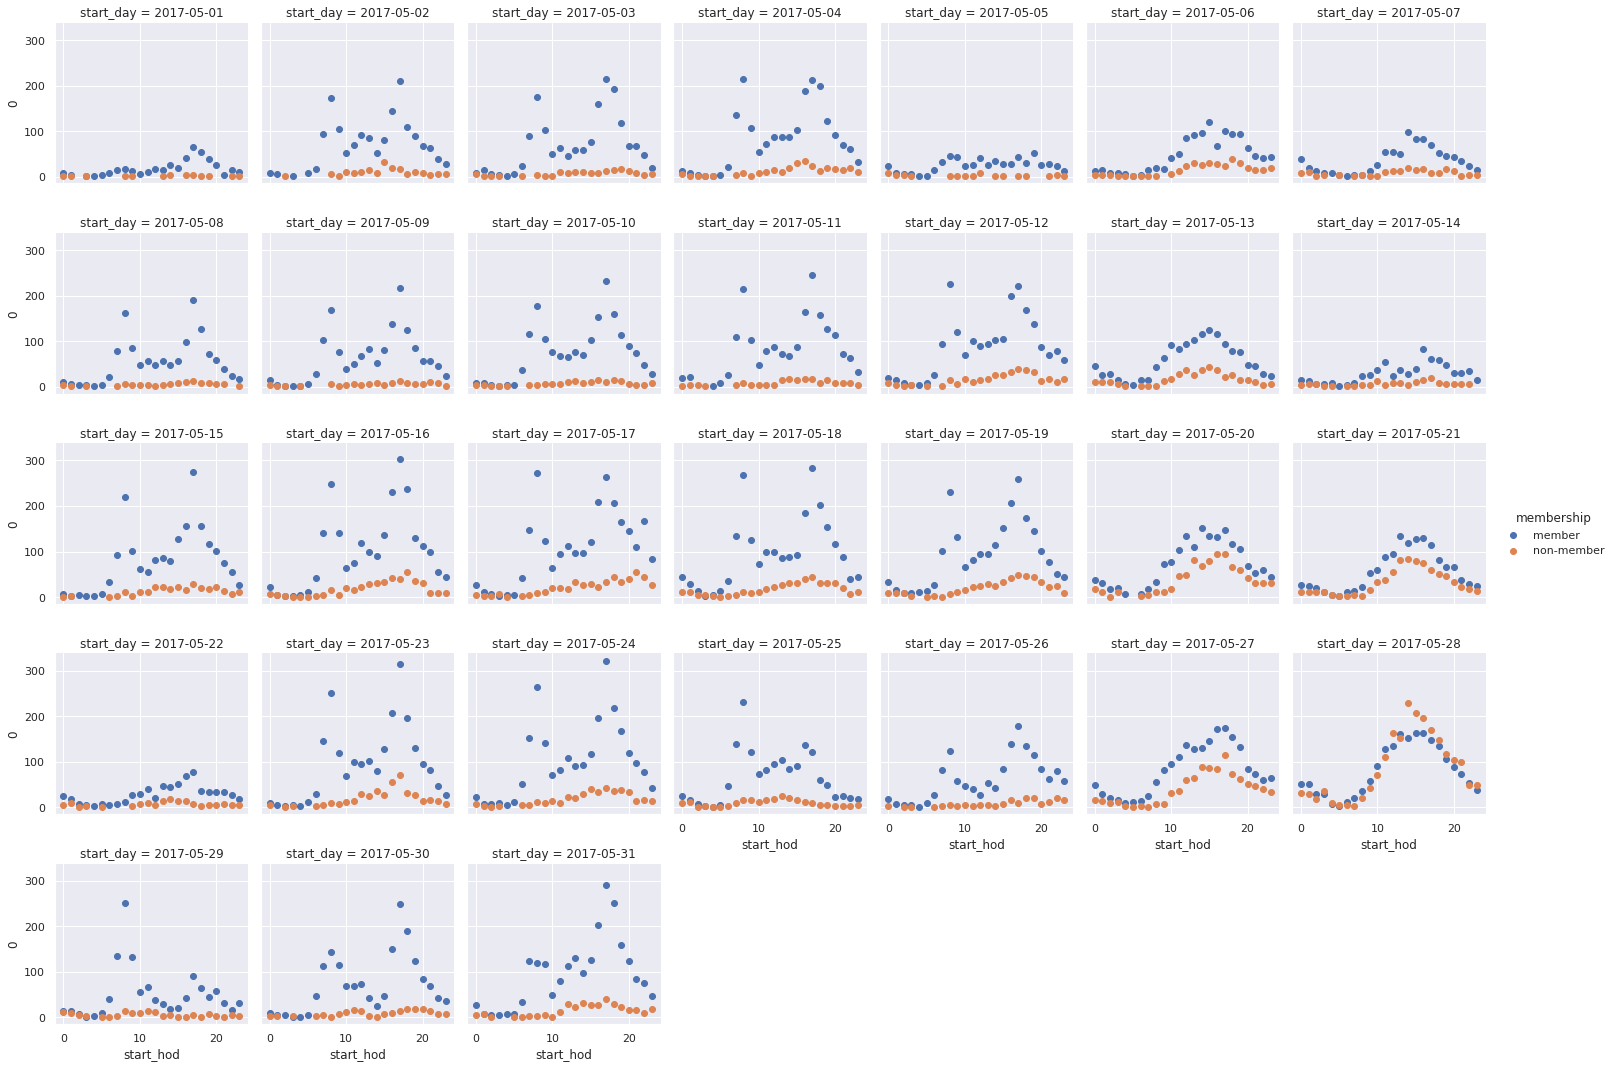

In [ ]:
g = sns.FacetGrid(to_plot, col="start_day", col_wrap=7,  hue="membership")
g = (g.map(plt.scatter, 'start_hod', 0)
     .add_legend())